In [ ]:
!pip install georeader-spaceml fsspec gcsfs

In [1]:
import os
# Donwload key from next line link to access the buckets and requester pays requests to public bucket (this is needed to query Sentinel-2 data)
os.environ["GS_NO_SIGN_REQUEST"] = "YES"

In [2]:
%%time
from georeader.readers import S2_SAFE_reader

safe_file = "S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE"
s2_safe_folder = S2_SAFE_reader.s2_public_bucket_path(safe_file)

print(f"File is located at: {s2_safe_folder}")

s2obj = S2_SAFE_reader.s2loader(s2_safe_folder, out_res=10)
s2obj

/home/gonzalo/mambaforge/envs/marss2_vm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


File is located at: gs://gcp-public-data-sentinel-2/tiles/49/S/GV/S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE
CPU times: user 1.82 s, sys: 1.56 s, total: 3.38 s
Wall time: 8.29 s


 
         gs://gcp-public-data-sentinel-2/tiles/49/S/GV/S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE
         Transform: | 10.00, 0.00, 699960.00|
| 0.00,-10.00, 4000020.00|
| 0.00, 0.00, 1.00|
         Shape: (13, 10980, 10980)
         Resolution: (10.0, 10.0)
         Bounds: (699960.0, 3890220.0, 809760.0, 4000020.0)
         CRS: EPSG:32649
         bands: ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
         fill_value_default: 0
        

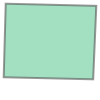

In [3]:
footprint = s2obj.footprint(crs="epsg:4326")
footprint

## Metadata files in S2 images

There are two metadata files in Sentinel-2 images, these are saved in the attributes:
 * `s2obj.metadata_msi`. In this file we have the solar irradiance, scale factor U, quantification values and radio add offsets.
 * `s2obj.metadata_tl`. Here we have the solar and viewing angles. This file is specific of L1C images

In [4]:
s2obj.metadata_msi

'gs://gcp-public-data-sentinel-2/tiles/49/S/GV/S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE/MTD_MSIL1C.xml'

In [5]:
s2obj.solar_irradiance()

{'B01': 1.8742999999999999,
 'B02': 1.95975,
 'B03': 1.8249300000000002,
 'B04': 1.5127899999999999,
 'B05': 1.42578,
 'B06': 1.29113,
 'B07': 1.17557,
 'B08': 1.04128,
 'B8A': 0.95393,
 'B09': 0.8175800000000001,
 'B10': 0.36541,
 'B11': 0.24708000000000002,
 'B12': 0.08775}

In [6]:
s2obj.scale_factor_U()

0.975631110815927

In [7]:
s2obj.quantification_value()

10000

When reading the data we automatically apply the radio offsets

In [8]:
s2obj.radio_add_offsets()

{'B01': -1000,
 'B02': -1000,
 'B03': -1000,
 'B04': -1000,
 'B05': -1000,
 'B06': -1000,
 'B07': -1000,
 'B08': -1000,
 'B8A': -1000,
 'B09': -1000,
 'B10': -1000,
 'B11': -1000,
 'B12': -1000}

In [9]:
s2obj.metadata_tl

'gs://gcp-public-data-sentinel-2/tiles/49/S/GV/S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE/GRANULE/L1C_T49SGV_A027271_20220527T031740/MTD_TL.xml'

In [10]:
# Trigger reading of metadata to inspect angles
s2obj.read_metadata_tl()

In [11]:
s2obj.mean_saa

131.536377934938

In [12]:
s2obj.mean_sza

19.9963398909342

In [13]:
s2obj.mean_vaa

{'B01': 126.71626827978,
 'B02': 134.025373678555,
 'B03': 131.374351951736,
 'B04': 129.400002573406,
 'B05': 128.353590682291,
 'B06': 127.731729632175,
 'B07': 127.498142587193,
 'B08': 132.434175716618,
 'B8A': 127.053148498046,
 'B09': 126.379870378688,
 'B10': 129.861408742839,
 'B11': 127.893230596876,
 'B12': 126.736610889672}

In [14]:
s2obj.mean_vza

{'B01': 3.68625117058342,
 'B02': 3.0838728710074,
 'B03': 3.18946067411809,
 'B04': 3.29825904111417,
 'B05': 3.36911102353786,
 'B06': 3.44180307391012,
 'B07': 3.52146467178658,
 'B08': 3.13105485372435,
 'B8A': 3.60143308327063,
 'B09': 3.77484901438726,
 'B10': 3.2696304921444,
 'B11': 3.42988721523325,
 'B12': 3.61676668649388}

The `sza` and `vza` attributes are `GeoTensor` objects

In [15]:
s2obj.sza

 
         Transform: | 5000.00, 0.00, 699960.00|
| 0.00,-5000.00, 4000020.00|
| 0.00, 0.00, 1.00|
         Shape: (23, 23)
         Resolution: (5000.0, 5000.0)
         Bounds: (699960.0, 3885020.0, 814960.0, 4000020.0)
         CRS: EPSG:32649
         fill_value_default: 0
        

<Axes: title={'center': 'SAA'}>

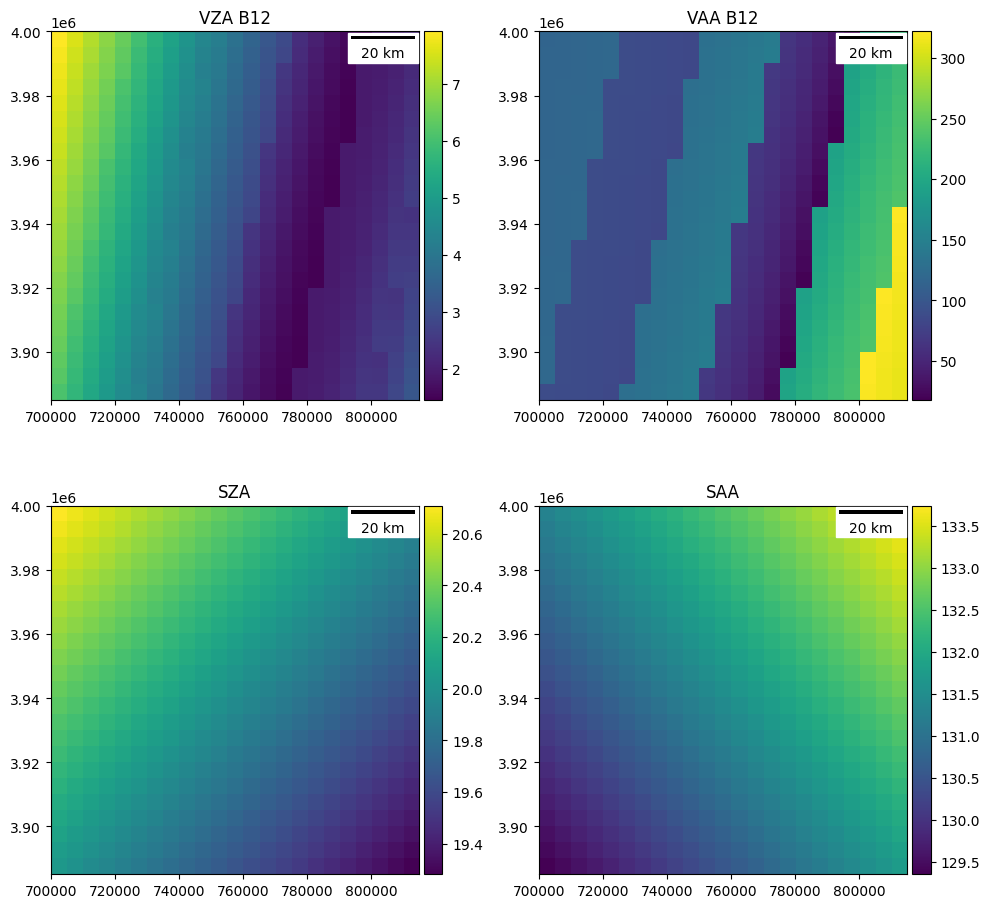

In [16]:
from georeader.plot import show
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2,figsize=(10,10), tight_layout=True)
show(s2obj.vza["B12"], add_colorbar_next_to=True, add_scalebar=True,
    ax=ax[0,0],title="VZA B12")
show(s2obj.vaa["B12"], add_colorbar_next_to=True, add_scalebar=True,
    ax=ax[0,1],title="VAA B12")
show(s2obj.sza, add_colorbar_next_to=True, add_scalebar=True,
    ax=ax[1,0],title="SZA")
show(s2obj.saa, add_colorbar_next_to=True, add_scalebar=True,
    ax=ax[1,1],title="SAA")

## Load Spectral Response function

In [17]:
# reads SRF from S2_SAFE_reader.SRF_FILE_DEFAULT
srf = S2_SAFE_reader.read_srf(s2obj.mission)
srf

/home/gonzalo/mambaforge/envs/marss2_vm/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


B01  B02  B03  B04  B05  B06  B07  B08  B8A  B09  B10  B11   
SR_WL                                                                    
411    0.006241  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  \
412    0.010240  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
413    0.004030  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
414    0.006422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
415    0.005528  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2299   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2300   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2301   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2302   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2303   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            B12  
SR_WL            
411    0.000000  
412    0.000000  
413    0.000000  
414    0.000000  
415    0.000000  
...         ...  
2299   0.020036  
2300   0.013846  
2301   0.008505  
2302   0.004435  
2303   0.000853  

[877 rows x 13 columns]

Text(0.5, 0, 'wavelength (nm)')

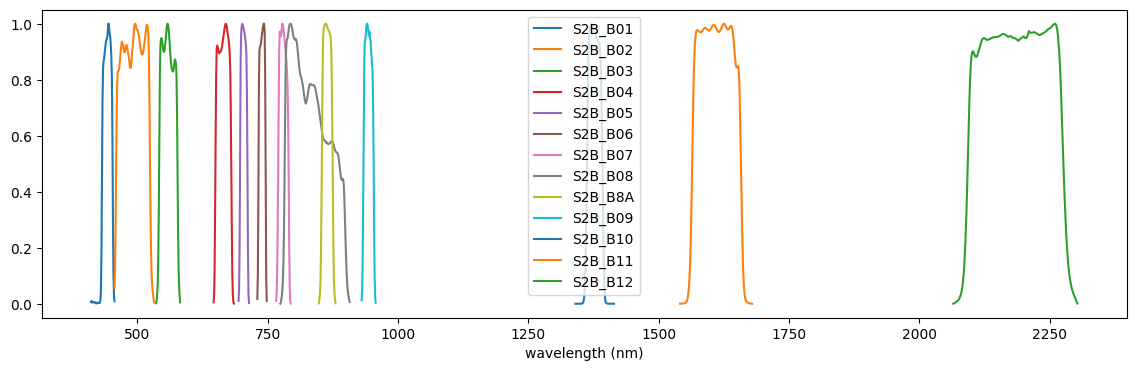

In [18]:
fig, ax = plt.subplots(1,1,figsize=(14,4))

for idx, b in enumerate(S2_SAFE_reader.BANDS_S2):
    mask_zero = srf[b] <=1e-4
    ax.plot(srf.index[~mask_zero], 
            srf[b][~mask_zero], label=f"{s2obj.mission}_{b}")
    
    
ax.legend()
ax.set_xlabel("wavelength (nm)")

### Reflectance to radiance conversion

We want the pixels of our images in [**spectral radiances**](https://en.wikipedia.org/wiki/Radiance) with units $W·sr^{-1}·m^{−2}·nm^{−1}$. Spectral raciances are (*watts per steradian per square meter per nanometer*).

According to this https://gis.stackexchange.com/questions/285996/convert-sentinel-2-1c-product-from-reflectance-to-radiance the formula to convert digital numbers (DN) in ToA images is:

toaBandX = (pixelValueBandX + radioAddOffsetBandX ) / 10000

radianceBandX = ((toaBandX * cos(incidenceAngle) * solarIrradianceBandX) / (pi * d2))

where d2 is the earth-sun distance correction. d2 is 1.0/U

The values for incidenceAngle, solarIrradianceBandX and U can be found in the 2 metadata files included in the download.

* In `metadata_msi` we can find the `solarIrradianceBandX`, the `radioAddOffsetBandX` and `U`. See xml content bellow!
* In `metadata_tl` we can find the `incidenceAngle` (which I assume is the solar zenith angle). 

If $J$ is the Julian day of the day of acquisition (day of the year), d2 can be computed as:

d2 = (1-e* cos(0.9856 * (J-4) * pi/180))^2

Where e=0.01673 is the Earth's orbit eccentricity

We're going to read an small crop of the image and convert it to radiances

In [19]:
%%time
from georeader import read

s2obj.bands = ["B04","B08", "B12"]

tensor = read.read_from_center_coords(s2obj, footprint.centroid.coords[0],shape=(512, 1024), crs_center_coords="epsg:4326", trigger_load=True)
tensor_toa = tensor / 10_000.

CPU times: user 1.35 s, sys: 199 ms, total: 1.55 s
Wall time: 27.9 s


<Axes: >

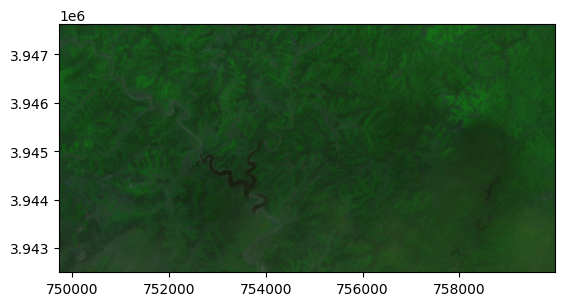

In [20]:
tensor_toa = tensor / 10_000.
show(tensor_toa)

In [21]:
tensor_radiance = s2obj.DN_to_radiance(tensor)
tensor_radiance.values

array([[[0.04348571, 0.04286764, 0.0406161 , ..., 0.04503088,
         0.04269105, 0.04330912],
        [0.04463355, 0.04269105, 0.03973313, ..., 0.04335326,
         0.0436623 , 0.04361815],
        [0.04441281, 0.04277934, 0.04114586, ..., 0.04520747,
         0.04432452, 0.04273519],
        ...,
        [0.05620031, 0.05633275, 0.05527321, ..., 0.07010691,
         0.06953299, 0.0693564 ],
        [0.05518491, 0.05514076, 0.05522906, ..., 0.07050425,
         0.07028349, 0.06997447],
        [0.05522906, 0.05465514, 0.05558224, ..., 0.07059254,
         0.07041594, 0.07041594]],

       [[0.08320179, 0.08605824, 0.09405023, ..., 0.09356403,
         0.09705862, 0.09936808],
        [0.08782074, 0.09228774, 0.09256123, ..., 0.09456682,
         0.09484031, 0.09490108],
        [0.08894508, 0.08900585, 0.08289791, ..., 0.09429333,
         0.09113299, 0.08943128],
        ...,
        [0.07010465, 0.06761285, 0.06600229, ..., 0.0859063 ,
         0.08529855, 0.08456924],
        [0.0

In [22]:
# Make sense since radiance in B12 is much lower than in B04
tensor_radiance.values[:, 100, 100]

array([0.04211712, 0.09052525, 0.00289629], dtype=float32)

## Licence
The georeader package is published under a [GNU Lesser GPL v3 licence](https://www.gnu.org/licenses/lgpl-3.0.en.html)

 If you find this work useful please cite:

```
@article{ruzicka_starcop_2023,
	title = {Semantic segmentation of methane plumes with hyperspectral machine learning models},
	volume = {13},
	issn = {2045-2322},
	url = {https://www.nature.com/articles/s41598-023-44918-6},
	doi = {10.1038/s41598-023-44918-6},
	number = {1},
	journal = {Scientific Reports},
	author = {Růžička, Vít and Mateo-Garcia, Gonzalo and Gómez-Chova, Luis and Vaughan, Anna, and Guanter, Luis and Markham, Andrew},
	month = nov,
	year = {2023},
	pages = {19999},
}
```